# Poisson modeling using LSTM models

In [1]:
import math
import numpy
import matplotlib.pyplot as plt
from src.poisson import Poisson
from src.lstm import LSTM
from sklearn.metrics import mean_squared_error
%matplotlib inline

Using TensorFlow backend.


### Example of our Poisson process

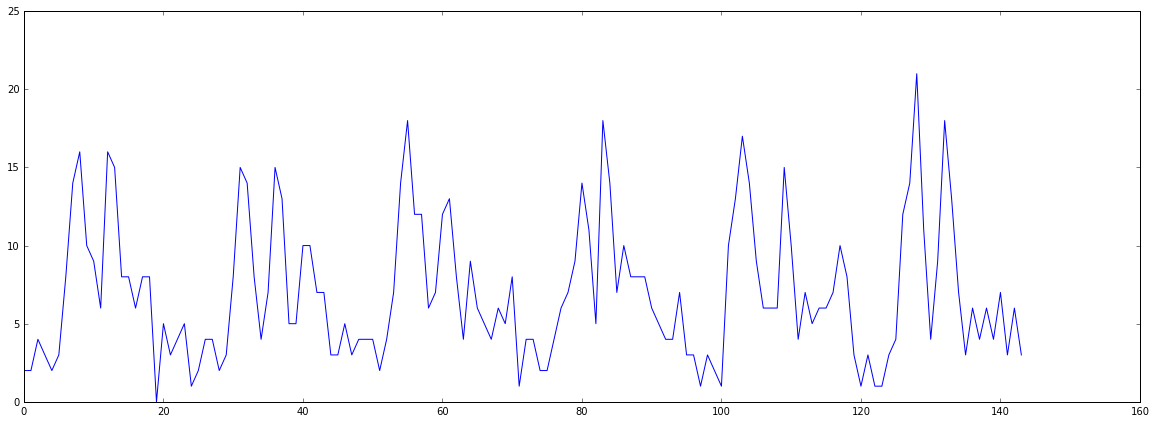

In [2]:
p = Poisson()
example = p.generate(6)

plt.figure(figsize=(20,7))
plt.plot(example)

### Train LSTM model on larger data set

In [16]:
train = p.generate(50000)
l = LSTM()
l.train(train, 20)

Epoch 1/20
223s - loss: 0.0081
Epoch 2/20
249s - loss: 0.0076
Epoch 3/20
209s - loss: 0.0074
Epoch 4/20
230s - loss: 0.0074
Epoch 5/20
228s - loss: 0.0073
Epoch 6/20
213s - loss: 0.0073
Epoch 7/20
185s - loss: 0.0073
Epoch 8/20
182s - loss: 0.0072
Epoch 9/20
177s - loss: 0.0072
Epoch 10/20
179s - loss: 0.0072
Epoch 11/20
179s - loss: 0.0072
Epoch 12/20
179s - loss: 0.0072
Epoch 13/20
186s - loss: 0.0072
Epoch 14/20
184s - loss: 0.0072
Epoch 15/20
187s - loss: 0.0072
Epoch 16/20
186s - loss: 0.0072
Epoch 17/20
183s - loss: 0.0072
Epoch 18/20
184s - loss: 0.0072
Epoch 19/20
178s - loss: 0.0072
Epoch 20/20
178s - loss: 0.0072


### Apply the LSTM model to a new data set that is more varied

In [ ]:
a1 = p.generate(4)
a2 = p.generate(2,2)
a3 = p.generate(4)
a4 = p.generate(1,2)
actual = numpy.concatenate((a1,a2,a3,a4))

pred = l.predict(actual)

### Plot the prediction

In [ ]:
actual = actual[48:-1]
error = math.sqrt(mean_squared_error(pred, actual))

plt.figure(figsize=(20,7))
plt.title('RMSE: {:.2f}'.format(error))
plt.plot(actual)
plt.plot(pred)

The moral of the story is that the look-back distance needs to be at least the number of samples in a cycle, the number of LSTM units tends to be better if it is larger, and the number of samples in the training set should be as large as possible to account for adequate variability.  The training time is quite long, and the ability to adapt to data that is significantly different than the patterns it has already seen is limited.  However, the execution time for a known model is fast.  This method does not track with new changes to the data since it is a one-time training on existing pattern examples.  This method also has the problem that we may not know the extrema of the data we need to train for.  It is hard to optimize the training without knowing this, and the result is unstable if new data is outside this range.